In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
N_EPOCHS = 100
train_rmse_list = []
test_rmse_list = []

In [26]:
x = tf.placeholder(tf.float32, [None,3])
w = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.zeros([1]))

In [27]:
def fwdNode(x, w, b):
    Input = tf.add(tf.matmul(x,w), b)
    Output = tf.nn.relu(Input)
    return Output

In [28]:
#Feed
Pred = fwdNode(x, w, b)

In [29]:
L1 = tf.placeholder(tf.float32, [None,3])
Out = tf.placeholder(tf.float32, [None,3])
cost_func = tf.reduce_mean(tf.square(Out - Pred))
#train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cost_func)
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cost_func)

In [30]:
data_csv = pd.read_csv('../myCSVData.csv')
X = data_csv[['in1','in2','in3']]
y = data_csv[['out1','out2','out3']]
#X, y

In [31]:
X_train = X[:40000]
X_test = X[40000:]
y_train = y[:40000]
y_test = y[40000:]

In [32]:
# Evaluation
rmse_a = tf.placeholder(tf.float32, [None, 3])
rmse_b = tf.placeholder(tf.float32, [None, 3])
rmse = tf.reduce_mean(tf.square(rmse_a - rmse_b))

In [33]:
init = tf.global_variables_initializer()

In [34]:
with tf.Session() as sess:
    
    sess.run(init)
    #print (sess.run(rmse_a))
    for epoch in range(N_EPOCHS):
        #print (epoch + 1)
        sess.run(train_step, feed_dict = {x:X_train, Out:y_train})
        train_pred = sess.run(Pred, feed_dict = {x:X_train})
        train_rmse = sess.run(cost_func, feed_dict={x: X_train, Out:y_train})
        train_rmse_list += [train_rmse]
       # print (sess.run(cost_func, feed_dict ))
        pred = sess.run(Pred, feed_dict = {x:X_test})
        test_rmse = sess.run(cost_func, feed_dict={x: X_test, Out:y_test})
        #print ("\nEpoch : ", (epoch+1), "\nRMSE : ", my_rmse)
        #print (pred)
        #print (sess.run(rmse, feed_dict = {rmse_a:X_test, rmse_b:y_test}))
        test_rmse_list += [test_rmse]

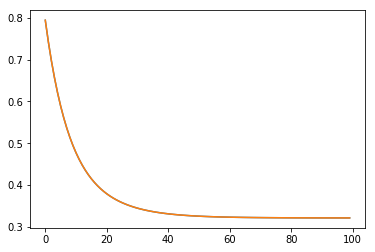

In [35]:
#TRAIN RMSE RELU
plt.plot(list(enumerate(range(len(train_rmse_list)))),train_rmse_list)

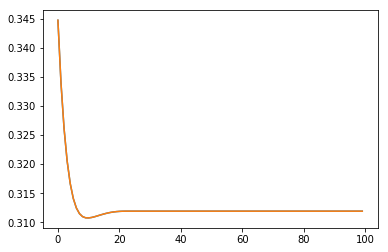

In [36]:
#TEST RMSE RELU
plt.plot(list(enumerate(range(len(test_rmse_list)))),test_rmse_list)
#what

In [37]:
# Why does the plot shape like this?
train_rmse_list

[0.79399735,
 0.7422398,
 0.6965431,
 0.6561702,
 0.6204676,
 0.5888748,
 0.56090313,
 0.53611565,
 0.5141349,
 0.4946183,
 0.4772796,
 0.46185437,
 0.44811657,
 0.43585962,
 0.42490634,
 0.41510952,
 0.40633416,
 0.3984633,
 0.39139694,
 0.38504845,
 0.37933388,
 0.37418112,
 0.36953297,
 0.36533085,
 0.361524,
 0.35807273,
 0.35493788,
 0.3520876,
 0.34949648,
 0.3471361,
 0.3449862,
 0.343026,
 0.3412369,
 0.33960396,
 0.33811337,
 0.33675045,
 0.33550435,
 0.33436415,
 0.3333213,
 0.3323664,
 0.33149186,
 0.3306899,
 0.32995522,
 0.329281,
 0.32866287,
 0.32809603,
 0.32757565,
 0.3270977,
 0.32665902,
 0.3262558,
 0.32588607,
 0.32554635,
 0.325234,
 0.32494694,
 0.32468325,
 0.32444072,
 0.32421777,
 0.32401237,
 0.32382357,
 0.32365027,
 0.3234906,
 0.32334414,
 0.3232091,
 0.32308516,
 0.32297063,
 0.3228653,
 0.32276866,
 0.32267967,
 0.32259765,
 0.32252198,
 0.32245255,
 0.32238865,
 0.32232988,
 0.32227564,
 0.32222578,
 0.32217982,
 0.32213756,
 0.32209867,
 0.3220629,
 0.

In [24]:
test_rmse_list

[1.3997049,
 1.29654,
 1.2133417,
 1.1431369,
 1.0832449,
 1.0315928,
 0.98657537,
 0.94694954,
 0.9116873,
 0.88015455,
 0.85183823,
 0.8263057,
 0.8031962,
 0.7822171,
 0.7630919,
 0.74559164,
 0.72952586,
 0.7147363,
 0.7010836,
 0.6884489,
 0.67672986,
 0.6658341,
 0.65568787,
 0.646222,
 0.63737017,
 0.6290797,
 0.6212854,
 0.6139003,
 0.60689694,
 0.60025144,
 0.5939381,
 0.5879387,
 0.58223027,
 0.5767972,
 0.5716214,
 0.56668866,
 0.5619867,
 0.5574972,
 0.55321085,
 0.54911643,
 0.5452003,
 0.5414559,
 0.53787035,
 0.53443974,
 0.5311514,
 0.5280009,
 0.5249793,
 0.52208,
 0.5192977,
 0.5166272,
 0.5140607,
 0.5115936,
 0.5092217,
 0.5069382,
 0.50474393,
 0.5026278,
 0.5005932,
 0.49863276,
 0.49674323,
 0.49491972,
 0.49316293,
 0.4914671,
 0.48982507,
 0.48824328,
 0.48671737,
 0.48524293,
 0.48381722,
 0.48243755,
 0.4811024,
 0.47981107,
 0.4785631,
 0.47735453,
 0.47618246,
 0.475049,
 0.47394952,
 0.47288254,
 0.4718468,
 0.4708418,
 0.4698664,
 0.468923,
 0.4680064,
 0